<div style="background-color:#035FCA; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> Roberta Base </div>

<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">🔧Working of the architecture⚙️
 </div>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
- Suppose we have the following sentence: "The quick brown fox jumps over the lazy dog".<br>
- To process this sentence using Robert's base, we first need to build it into subword order using the BPE token. The tokenizer breaks the sentence into the following subwords:<br>
["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog", "."]<br>
- Each subword is assigned a unique numeric ID called input_id. The input_id for this statement is:<br>
[0, 2327, 1669, 1239, 1029, 1231, 1103, 0, 10747, 995, 2]<br>
- Then pad the input_ids with zeros to ensure that all sequences are the same length. In this case, the maximum sequence length is 10, so the input_ids are padded with the following lengths:
[0, 2327, 1669, 1239, 1029, 1231, 1103, 0, 10747, 995]<br>
- In addition to input_ids, Robert's base generates an attention mask, which is a binary mask indicating which tokens in the input sequence the model should focus on. The attention mask is generated by setting the value to 1 for all unpadded markers and 0 for all padded markers. In this case, the attention mask would be:
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]<br>
- Finally, Robert's base also generates a tensor of token_type_ids, which is used to distinguish between different segments of the input sequence. In this case, there is only one segment, so all token_type_ids are set to 0.<br>
<br>
- Once the input_id, attention mask, and token_type_ids are generated, they are fed into Robert's base model for processing. During the training, the model is optimized to reduce the loss function that measures the difference between the expected output and the real output. The model is trained in the large text data body and has learned to recognize text patterns, there are signs of its task, such as prediction of the next word in a sentence or classification of the text fragment.<br></div>

<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> How does Roberta fit in for the task ? 🤔</div><br>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
- In order to predict the readability level in CommonLit Readability Prize Challenge texts with Roberta base methodology, we must first tokenize them into sequences of subwords. Hugging Face library provides us with a tokenizer that accomplishes this by converting texts into sequences of input_ids, attention_ids, and token_type_ids. 
<br>
- Input ids numerically represent subwords within texts while attention ids give us information on which ones are particularly important for our model's output generation. 
<br>
- Token type ids enable our models to distinguish between different parts or segments within an inputted text (such as distinction between questions and answers). 
<br>
- With our segmented data good-to-go thanks to Hugging Face's library support , we can now feed it all through Roberta base model itself! Having been trained extensively on various forms/styles/texts prior . It is capable now if recognizing patterns directly relevant/indicative towards that very elusive 'readability level' all those participating in The CommonLit Readability Prize seek after! The complexity of sentence structures and advanced vocabulary in an input text can increase the predicted readability level according to some models. 
<br>
- Simpler texts using less sophisticated language are more likely to be assigned lower predicted levels by these models.
<br></div>

<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 🏢 Architecture Diagram.
 </div>

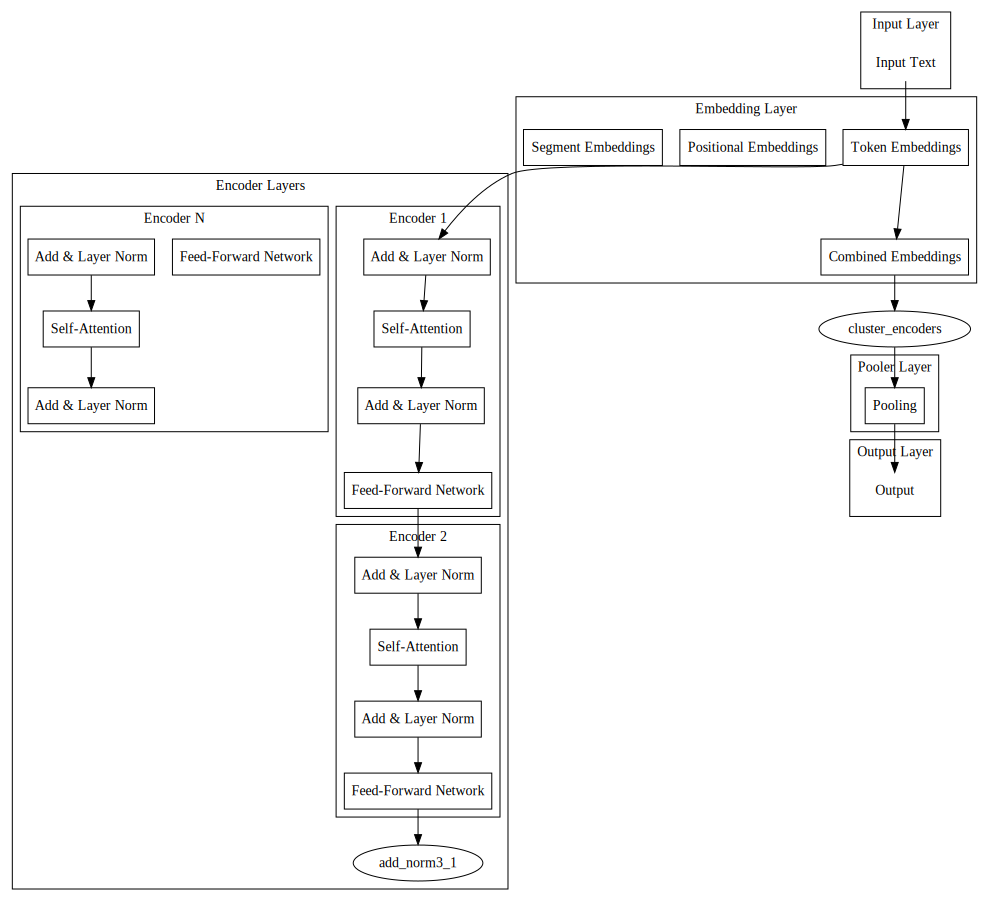

In [21]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/notebook-images/roberta-base.svg'
display(SVG(filename=svg_file))

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">Installing transformers</div>

In [1]:
!pip install transformers --quiet

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">Setting device for torch</div>

In [2]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">Importing modules</div>

In [3]:
#importing modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">Reading the dataframe</div>

In [4]:
df = pd.read_csv('/kaggle/input/commonlitreadabilityprize/train.csv')

In [5]:
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The following dataset class takes in four parameters: texts, targets, tokenizer, and max_length.<br>
The texts parameter represents the text data that is being passed to the dataset.<br>
The targets parameter represents the target values for the text data. The tokenizer parameter is the tokenizer used to tokenize the text data. The max_length parameter represents the maximum length of the input text.<br>
The len method returns the length of the texts data. The getitem method takes an index as input and returns a dictionary that contains the input_ids, attention_mask, and target values for that particular index.<br></div>

In [6]:
#creating dataset class
class CommonLitDataset(Dataset):
    def __init__(self, texts, targets, tokenizer, max_length):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        target = self.targets.iloc[idx]
        encoding = self.tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=self.max_length)
        return {'input_ids': encoding['input_ids'].squeeze(), 'attention_mask': encoding['attention_mask'].squeeze(), 'target': torch.tensor(target, dtype=torch.float)}


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The CommonLitModel class inherits from the nn.Module class, which is the base class for all PyTorch neural network modules. The __init__ method initializes the model and its components. The AutoModel method in the transformer library is used to load a pre-trained model, and the nn.Linear method is used to create a linear layer that maps a hidden model dimension to a single output value.<br>

The Forward method determines the forward transition of the model. It requires two inputs - input_ids and attention_mask. The input_ids are in the tokenized input model, and the attention mask is a binary mask that indicates which tokens are padding tokens and which are actual tokens. output is the output of the pre-trained model, and pooler_output is the output of the last layer of the model, which is used as the input of the linear layer. The output of the linear layer is then returned as the final output of the model.<br></div>

In [7]:
#creating model class
class CommonLitModel(nn.Module):
    def __init__(self, model_name):
        super(CommonLitModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.linear = nn.Linear(self.model.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        pooler_output = outputs['pooler_output']
        return self.linear(pooler_output)

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The following function train accepts four input arguments: model, data loader, optimizer, criterion, and entity.<br>
<br>
The model refers to the neural network model that will be trained. Dataloader is an iterable object for loading training data.<br>
Optimizers are optimization algorithms used to update model weights during training. <br>

The criterion is a loss function that measures the difference between predicted output and actual output.<br>

The device indicates whether to use the CPU or GPU for calculations. <br>

The function first puts the model in training mode using model.train(), Then do the following for each data packet in the data loader:<br>

- The optimizer resets the model parameter gradients to zero using optimizer.zero_grad().<br>
- Use input_ids.to(device), target.to(device), and attention_mask.to(device) to extract the input data, target label, and attention mask from the batch and move it to the specified device.<br>
- Pass input data and an attention mask to the model to generate the expected output using model (input_ids, attention mask). Calculate the difference between the predicted output and the target label using the criterion loss function to obtain the loss value.<br>
- Use loss.backward() to calculate the gradient of the model parameters with respect to the loss value. The optimizer is used to update the model parameter using optimizer.step ().<br>
- The loss of the current batch is added to the value of the operating loss. After all batches have been processed in the data loader, the function returns the average loss value across all lots. <br> </div>

In [8]:
#training loop
def train(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for batch in dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        target = batch['target'].to(device)
        output = model(input_ids, attention_mask)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(dataloader)

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The evaluation function has four input parameters:<br>
<br>
- Model: A trained deep learning model to evaluate<br>
- Dataloader: An instance of the DataLoader class that iterates over the validation dataset<br>
- Criterion: A loss function used to calculate model performance<br>
- Device: The device on which the model is evaluated (e.g. CPU or GPU)<br>
<br>
Working of the code <br>
<br>
Use the model.eval() method to put the model into evaluation mode. Then use a for loop to loop over each batch of data in the validation dataset. For each batch, extract the input ID, attention mask, and target value from the batch and move them to the specified unit using the to() method. The model's pass method is called with the input id and attention mask as arguments, and the resulting output is stored in the output variable. Calculates the loss between the model output and the target value using the specified loss function and adds the loss value to the run_loss variable.<br>
<br>
Finally, the average loss across all batches of the validation data set is calculated by dividing run_loss by the length of the data loader and is returned as the output of the function.<br></div>

In [9]:
#validation loop
def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            target = batch['target'].to(device)
            output = model(input_ids, attention_mask)
            loss = criterion(output, target)
            running_loss += loss.item()
    return running_loss / len(dataloader)

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Finally, The model is trained after splitting the data into train,val split</div>

In [10]:
train_texts, val_texts, train_targets, val_targets = train_test_split(df['excerpt'], df['target'], test_size=0.2, random_state=42)

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Dataset for train, val split is created in this snippet.</div>

In [11]:
#initialize the tokenizer and create datasets
model_name = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)
max_length = 256

train_dataset = CommonLitDataset(train_texts, train_targets, tokenizer, max_length)
val_dataset = CommonLitDataset(val_texts, val_targets, tokenizer, max_length)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Dataloaders are created in this snippet.</div>

In [12]:
#create dataloaders
batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Sanity check of dataloader are done in this snippet</div>

In [13]:
for batch in train_dataloader:
    print(batch)
    break

{'input_ids': tensor([[    0, 11478,   415,  ...,     1,     1,     1],
        [    0,   133, 16192,  ...,     1,     1,     1],
        [    0,   113,  7608,  ...,     1,     1,     1],
        ...,
        [    0,  3762,     9,  ...,     1,     1,     1],
        [    0,   170,    56,  ...,     1,     1,     1],
        [    0, 36176,     4,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'target': tensor([ 0.8109, -1.9890, -0.4486, -2.3668, -0.6239, -1.3741, -0.6689, -0.6543,
        -1.4036, -0.7628,  0.0197, -1.1634,  1.0784, -0.9335, -2.4172, -0.0505,
        -1.6221, -0.8274, -0.1407,  1.0203, -1.5631, -2.0578, -1.7984, -1.4224,
        -1.9779,  0.1239, -2.6793, -2.1231,  0.0987, -2.4935, -2.2186, -0.9216])}


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Model is moved to device after initialisation along with defining the optimizer and loss function.</div>

In [14]:
model = CommonLitModel(model_name).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.MSELoss()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Model is trained for 10 epochs.</div>

In [15]:
#Training the model
num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train(model, train_dataloader, optimizer, criterion, device)
    val_loss = evaluate(model, val_dataloader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([27])) that is different to the input size (torch.Size([27, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([23])) that is different to the input size (torch.Size([23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta

Epoch 1/10, Train Loss: 1.2169, Validation Loss: 1.0498
Epoch 2/10, Train Loss: 1.0925, Validation Loss: 1.0466
Epoch 3/10, Train Loss: 1.0819, Validation Loss: 1.0484
Epoch 4/10, Train Loss: 1.0824, Validation Loss: 1.0488
Epoch 5/10, Train Loss: 1.0828, Validation Loss: 1.0594
Epoch 6/10, Train Loss: 1.0824, Validation Loss: 1.0529
Epoch 7/10, Train Loss: 1.0842, Validation Loss: 1.0573
Epoch 8/10, Train Loss: 1.0785, Validation Loss: 1.0501
Epoch 9/10, Train Loss: 1.0813, Validation Loss: 1.0470
Epoch 10/10, Train Loss: 1.0817, Validation Loss: 1.0581


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The model is saved in this snippet</div>

In [16]:
#save the model
torch.save(model.state_dict(), 'commonlit_model.pth')


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Model is loaded in this snippet</div>

In [17]:
#load the model for evaluation
model.load_state_dict(torch.load('commonlit_model.pth'))


<All keys matched successfully>

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Validation loss is calculated in this snippet</div>

In [18]:
val_loss = evaluate(model, val_dataloader, criterion, device)
print(f"Validation Loss: {val_loss:.4f}")


Validation Loss: 1.0581


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The get_preditions() function takes three parameters: a model, a data loader, and an entity.<br>
<br>
- Model is a pre-trained model that will be used to make predictions.<br>
- Dataloader is a validation data loader that contains batches of validation datasets.<br>
- Device specifies the device (GPU or CPU) on which to perform the calculation. In this function, model.eval() puts the model into evaluation mode to disable training-specific operations such as dropout. <br>
- The prediction list is initialized to hold the predicted values. Using torch.no_grad (): The context manager is used to exclude the gradient calculation, making the inference process faster and more efficient.<br>
- This feature is then repeated through the data loading program and the input_ids and attention_mask are obtained from each batch of the dataloader. 
- These input values, along with the attention mask, are then fed to the model to produce output values.<br>
- The predictions generated by the model are then transformed into a list and expanded to the pre-initialized list of predictions. Finally, the function returns a list of predictions.<br>
</div>

In [19]:
def get_predictions(model, dataloader, device):
    model.eval()
    predictions = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            output = model(input_ids, attention_mask)
            predictions.extend(output.squeeze().tolist())
    return predictions

val_predictions = get_predictions(model, val_dataloader, device)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Mean square error between validation targets and predictions are calculated in this snippet.</div>

In [20]:
mse = mean_squared_error(val_targets, val_predictions)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 1.0285
